In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
tiegcm1 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/tiegcm_s_ensmean.nc.23')
tiegcm2 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/tiegcm_s_ensmean.nc.24')
tiegcm3 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/tiegcm_s_ensmean.nc.25')

In [13]:
tiegcm1.day.values

array([176, 176], dtype=int32)

In [ ]:
times = []
for i in np.arange(0,25,1):
    if i < 10:
      times.append(f'0{i}')
    else:
      times.append(f'{i}')

inset = '24'
for idx, i in enumerate(times):
    if i == inset:
      index = idx
      print(index)

print(int(times[2]))

24
2


In [ ]:
def density(tiegcm_filepath, latitude, longitude, altitude):
  '''Inputs: latitude = 0-35 (corresponds to -87.5-87.5)
             longitude = 0-71 (corresponds to -180-180)
             altitude = 0-28 (corresponds to pressure levels)'''
  tiegcm = xr.open_dataset(f'/content/gdrive/MyDrive/msci_satellite_data/{tiegcm_filepath}')
  temperature = tiegcm.TN.values[0,altitude,latitude,longitude]
  atomic_oxygen = tiegcm.O1.values[0,altitude,latitude,longitude]
  molecu_oxygen =  tiegcm.O2.values[0,altitude,latitude,longitude]
  pressure = tiegcm.p0*100
  mean_molecular_weight = (1/1000)*(1/((atomic_oxygen/16)+(molecu_oxygen/32)+((1-atomic_oxygen-molecu_oxygen)/28)))
  density = (pressure*mean_molecular_weight)/(8.314*temperature)
  return density

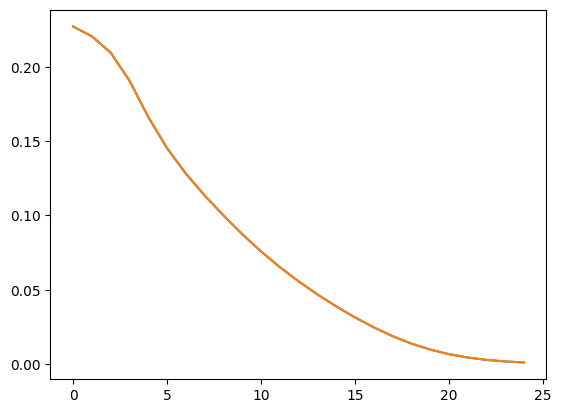

In [ ]:
plt.plot(tiegcm.O2.values[0,0:25,20,20])
plt.plot(tiegcm.O2_NM.values[0,0:25,20,20])
plt.show()

In [ ]:
a = []
for i in np.arange(0,36,1):
    den = density('tiegcm_p_ensmean.nc.00', i, 36, 18)
    a.append(den)

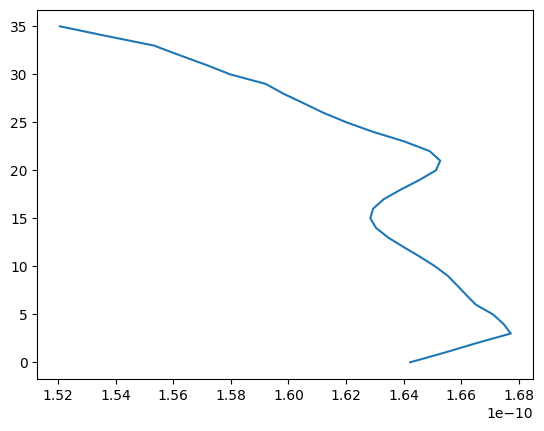

In [ ]:
plt.plot(a, np.arange(0,36,1))

In [ ]:
#tiegcm.p0_model.values - tiegcm.p0.values # 2 reference pressures?
np.exp(0)

1.0

In [ ]:
import math
def height(tiegcm_filepath, latitude, longitude, altitude):
  '''Inputs: latitude = 0-35 (corresponds to -87.5-87.5)
             longitude = 0-71 (corresponds to -180-180)
             altitude = 0-28 (corresponds to pressure levels)'''
  tiegcm = xr.open_dataset(f'/content/gdrive/MyDrive/msci_satellite_data/{tiegcm_filepath}')
  temperature = tiegcm.TN.values[10,altitude,latitude,longitude]
  atomic_oxygen = tiegcm.O1.values[10,altitude,latitude,longitude]
  molecu_oxygen =  tiegcm.O2.values[10,altitude,latitude,longitude]
  #pressure = tiegcm.p0/np.exp(tiegcm.lev[altitude])
  mean_molecular_weight = (1/1000)*(1/((atomic_oxygen/16)+(molecu_oxygen/32)+((1-atomic_oxygen-molecu_oxygen)/28)))
  #density = (pressure*mean_molecular_weight)/(8.314*temperature)
  scale_height = (8.314*temperature)/(9.8*mean_molecular_weight)
  #height = -math.log(0.04270293813/5e-5)*scale_height
  height = tiegcm.lev[altitude]*scale_height
  return scale_height, height

In [ ]:
a, b = height('tiegcm_p_ensmean.nc.00', 34, 36, 0)
b

<xarray.DataArray 'lev' ()>
array(-34037.14723712)
Coordinates:
    lev      float64 -6.75
    LBC      float64 ...

In [ ]:
tiegcm.lev

<xarray.DataArray 'lev' (lev: 29)>
array([-6.75, -6.25, -5.75, -5.25, -4.75, -4.25, -3.75, -3.25, -2.75, -2.25,
       -1.75, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,
        3.25,  3.75,  4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25])
Coordinates:
  * lev      (lev) float64 -6.75 -6.25 -5.75 -5.25 -4.75 ... 5.75 6.25 6.75 7.25
    LBC      float64 ...
Attributes:
    long_name:      midpoint levels
    short_name:     ln(p0/p)
    units:          
    positive:       up
    standard_name:  atmosphere_ln_pressure_coordinate
    formula_terms:  p0: p0 lev: lev
    formula:        p(k) = p0 * exp(-lev(k))

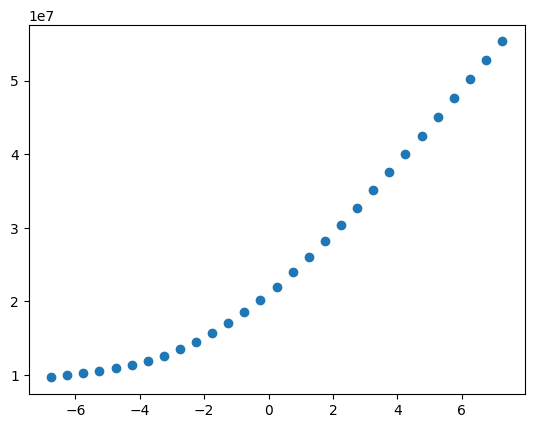

In [ ]:
############################## 12/03/24
plt.plot(tiegcm.lev, tiegcm.Z.values[10,:,10,10], 'o')
differences = []
for i in range(1, len(tiegcm.Z.values[10,:,10,10])):
    differences.append(tiegcm.Z.values[10,:,10,10][i] - tiegcm.Z.values[10,:,10,10][i-1])

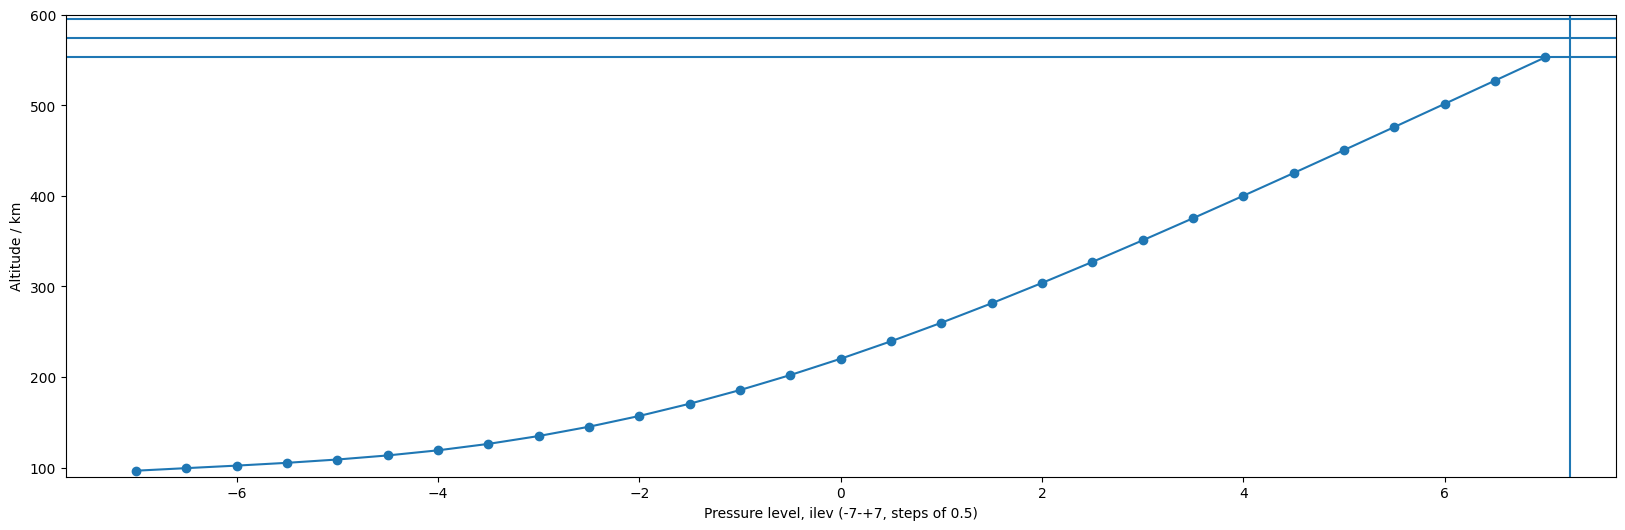

For level 7, height is 552.9353498050972


In [ ]:
from scipy import interpolate
plt.figure(figsize=(20,6))
plt.plot(tiegcm.ilev, tiegcm.Z.values[15,:,10,10]/100000, 'o-')
plt.xlabel('Pressure level, ilev (-7-+7, steps of 0.5)')
plt.ylabel('Altitude / km')
plt.ylim(90,600)
plt.axvline(7.25)
plt.axhline(tiegcm.Z.values[15,-1,10,10]/100000)
plt.axhline(594.8852979576111)
plt.axhline(tiegcm.Z.values[15,-1,10,10]/100000 + 5*(594.8852979576111 - tiegcm.Z.values[15,-1,10,10]/100000)/10)
plt.show()
f = interpolate.interp1d(tiegcm.ilev, tiegcm.Z.values[15,:,10,10]/100000) # Create an interpolation function
lev =  7
y_value = f(lev)
print(f'For level {lev}, height is {y_value}')

In [ ]:
tiegcm.Z.values[15,-1,10,10]/100000 + 5*(594.8852979576111 - tiegcm.Z.values[15,-1,10,10]/100000)/10 # 7.25 height

573.9103238813541

In [ ]:
n = 26  # You can adjust this value as needed
coefficients = np.polyfit(tiegcm.ilev.values, tiegcm.Z.values[15,:,10,10]/100000, n)

# Create a polynomial function
f = np.poly1d(coefficients)

# Now you can use this function to find the y value for any given x value
# For example, to find the y value when x is 1 unit beyond its maximum value
x_value = 8
y_value = f(x_value)
print(f'The corresponding y value for x = {x_value} is {y_value}')

The corresponding y value for x = 8 is 7141.90760236866


In [ ]:
tiegcm.Z.values[15,2,10,10]/100000 - 102.24923377301702

7.313332162084407e-10

In [ ]:
tiegcm.ilev.values

array([-7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. ,
       -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,
        4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])

In [ ]:
tiegcm.lev

<xarray.DataArray 'lev' (lev: 29)>
array([-6.75, -6.25, -5.75, -5.25, -4.75, -4.25, -3.75, -3.25, -2.75, -2.25,
       -1.75, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,
        3.25,  3.75,  4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25])
Coordinates:
  * lev      (lev) float64 -6.75 -6.25 -5.75 -5.25 -4.75 ... 5.75 6.25 6.75 7.25
    LBC      float64 ...
Attributes:
    long_name:      midpoint levels
    short_name:     ln(p0/p)
    units:          
    positive:       up
    standard_name:  atmosphere_ln_pressure_coordinate
    formula_terms:  p0: p0 lev: lev
    formula:        p(k) = p0 * exp(-lev(k))

In [ ]:
import math
temperature = tiegcm.TN.values[10,-2,10,10]
atomic_oxygen = tiegcm.O1.values[10,-2,10,10]
molecu_oxygen =  tiegcm.O2.values[10,-2,10,10]
pressure = tiegcm.p0_model*np.exp(-tiegcm.lev[-2])
mean_molecular_weight = (1/1000)*(1/((atomic_oxygen/16)+(molecu_oxygen/32)+((1-atomic_oxygen-molecu_oxygen)/28)))
#density = (pressure*mean_molecular_weight)/(8.314*temperature)
scale_height = (8.314*temperature)/(9.8*mean_molecular_weight)
height = math.log(pressure/tiegcm.p0_model)*scale_height
print(height)

-308524.3855770927


In [ ]:
tiegcm.time

<xarray.DataArray 'time' (time: 17)>
array(['2008-06-08T00:00:00.000000000', '2008-06-09T00:00:00.000000000',
       '2008-06-10T00:00:00.000000000', '2008-06-11T00:00:00.000000000',
       '2008-06-12T00:00:00.000000000', '2008-06-13T00:00:00.000000000',
       '2008-06-14T00:00:00.000000000', '2008-06-15T00:00:00.000000000',
       '2008-06-16T00:00:00.000000000', '2008-06-17T00:00:00.000000000',
       '2008-06-18T00:00:00.000000000', '2008-06-19T00:00:00.000000000',
       '2008-06-20T00:00:00.000000000', '2008-06-21T00:00:00.000000000',
       '2008-06-22T00:00:00.000000000', '2008-06-23T00:00:00.000000000',
       '2008-06-24T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-06-08 2008-06-09 ... 2008-06-24
    LBC      float64 ...
Attributes:
    long_name:      time
    initial_year:   2008
    initial_day:    160
    initial_mtime:  [160   0   0]

In [ ]:
###################################### FULL TEST
dp1 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/tiegcm_p_ensmean.nc.01')
ds1 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_s_ensmean.nc.01')

In [ ]:
ds1

<xarray.Dataset>
Dimensions:             (time: 2, lon: 72, lat: 36, lev: 29, ilev: 29,
                         mlon: 81, mlat: 97, mlev: 32, imlev: 32, mtimedim: 3,
                         dtidedim: 2, sdtidedim: 10, latlon: 2)
Coordinates:
  * time                (time) datetime64[ns] 2008-06-24 2008-06-24T01:00:00
  * lon                 (lon) float64 -180.0 -175.0 -170.0 ... 165.0 170.0 175.0
  * lat                 (lat) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lev                 (lev) float64 -6.75 -6.25 -5.75 -5.25 ... 6.25 6.75 7.25
  * ilev                (ilev) float64 -7.0 -6.5 -6.0 -5.5 ... 5.5 6.0 6.5 7.0
  * mlon                (mlon) float64 -180.0 -175.5 -171.0 ... 175.5 180.0
  * mlat                (mlat) float64 -90.0 -88.12 -86.24 ... 86.24 88.12 90.0
  * mlev                (mlev) float64 -8.25 -7.75 -7.25 ... 6.25 6.75 7.25
  * imlev               (imlev) float64 -8.5 -8.0 -7.5 -7.0 ... 5.5 6.0 6.5 7.0
    LBC                 float64 ...
Dimensions without coordinates: mtimedim, dtidedim, sdtidedim, latlon
Data variables: (12/80)
    mtime               (time, mtimedim) int32 ...
    year                (time) int32 ...
    day                 (time) int32 ...
    calendar_advance    (time) int32 ...
    write_date          (time) |S24 ...
    iter                (time) int32 ...
    ...                  ...
    DEN                 (time, ilev, lat, lon) float32 ...
    QJOULE              (time, lev, lat, lon) float32 ...
    HMF2                (time, lat, lon) float32 ...
    NMF2                (time, lat, lon) float32 ...
    ZG                  (time, ilev, lat, lon) float32 ...
    ZMAG                (time, imlev, mlat, mlon) float32 ...
Attributes: (12/28)
    Conventions:               CF-1.0
    label:                     tiegcm res=5.0
    create_date:               01/11/19 15:10:40
    logname:                   chihting
    host:                      r3i0n9
    system:                    LINUX
    ...                        ...
    tuv_lbc_intop:             0
    contents:                  08176 176  0  0 to 08176 176  1  0 by   60 tie...
    contents_desc:             yyddd day hour min to yyddd day hour min by de...
    history:                   Fri Jan 11 15:20:17 2019: ncea tiegcm_s.nc.000...
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

Text(0, 0.5, 'Altitude / km')

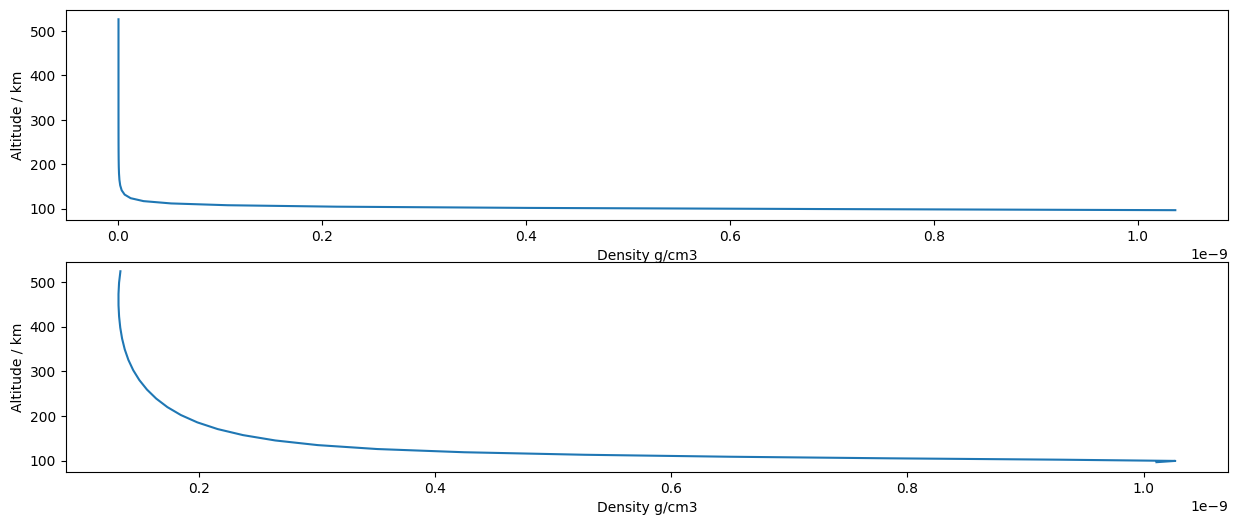

In [ ]:
d = []
for i in np.arange(0,28,1):
    d.append(density('matsuo_tiegcm_ose/tiegcm_p_ensmean.nc.00', 10, 10, i))
fig, axs = plt.subplots(2,1,figsize=(15,6))
axs[0].plot(ds1.DEN.values[1,:,10,10], ds1.ZG.values[1,:,10,10]/100000)
axs[0].set_xlabel('Density g/cm3')
axs[0].set_ylabel('Altitude / km')
axs[1].plot(d, dp1.Z.values[1,:-1,10,10]/100000)
axs[1].set_xlabel('Density g/cm3')
axs[1].set_ylabel('Altitude / km')

257.41104
398690.6


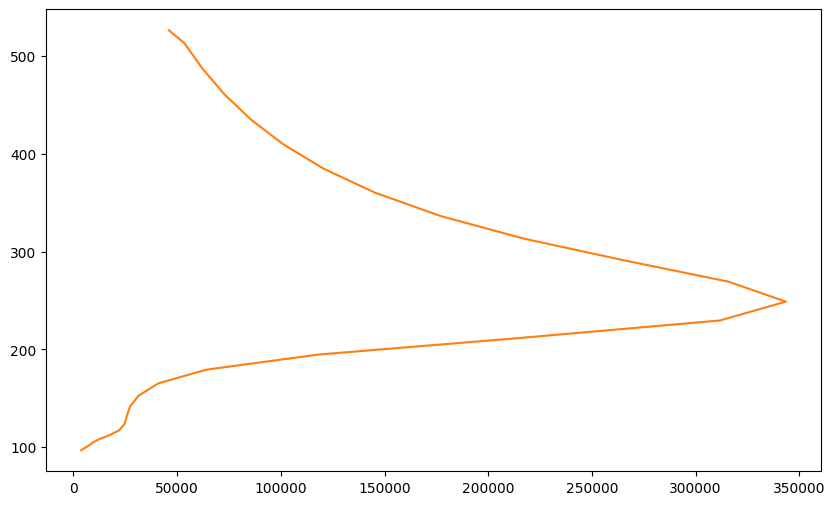

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ds1.NE.values[1,:,10,10], ds1.ZG.values[1,:,10,10]/100000, color='tab:orange')
print(ds1.HMF2.values[1,10,10])
print(ds1.NMF2.values[1,10,10])

IndexError: index 29 is out of bounds for axis 1 with size 29

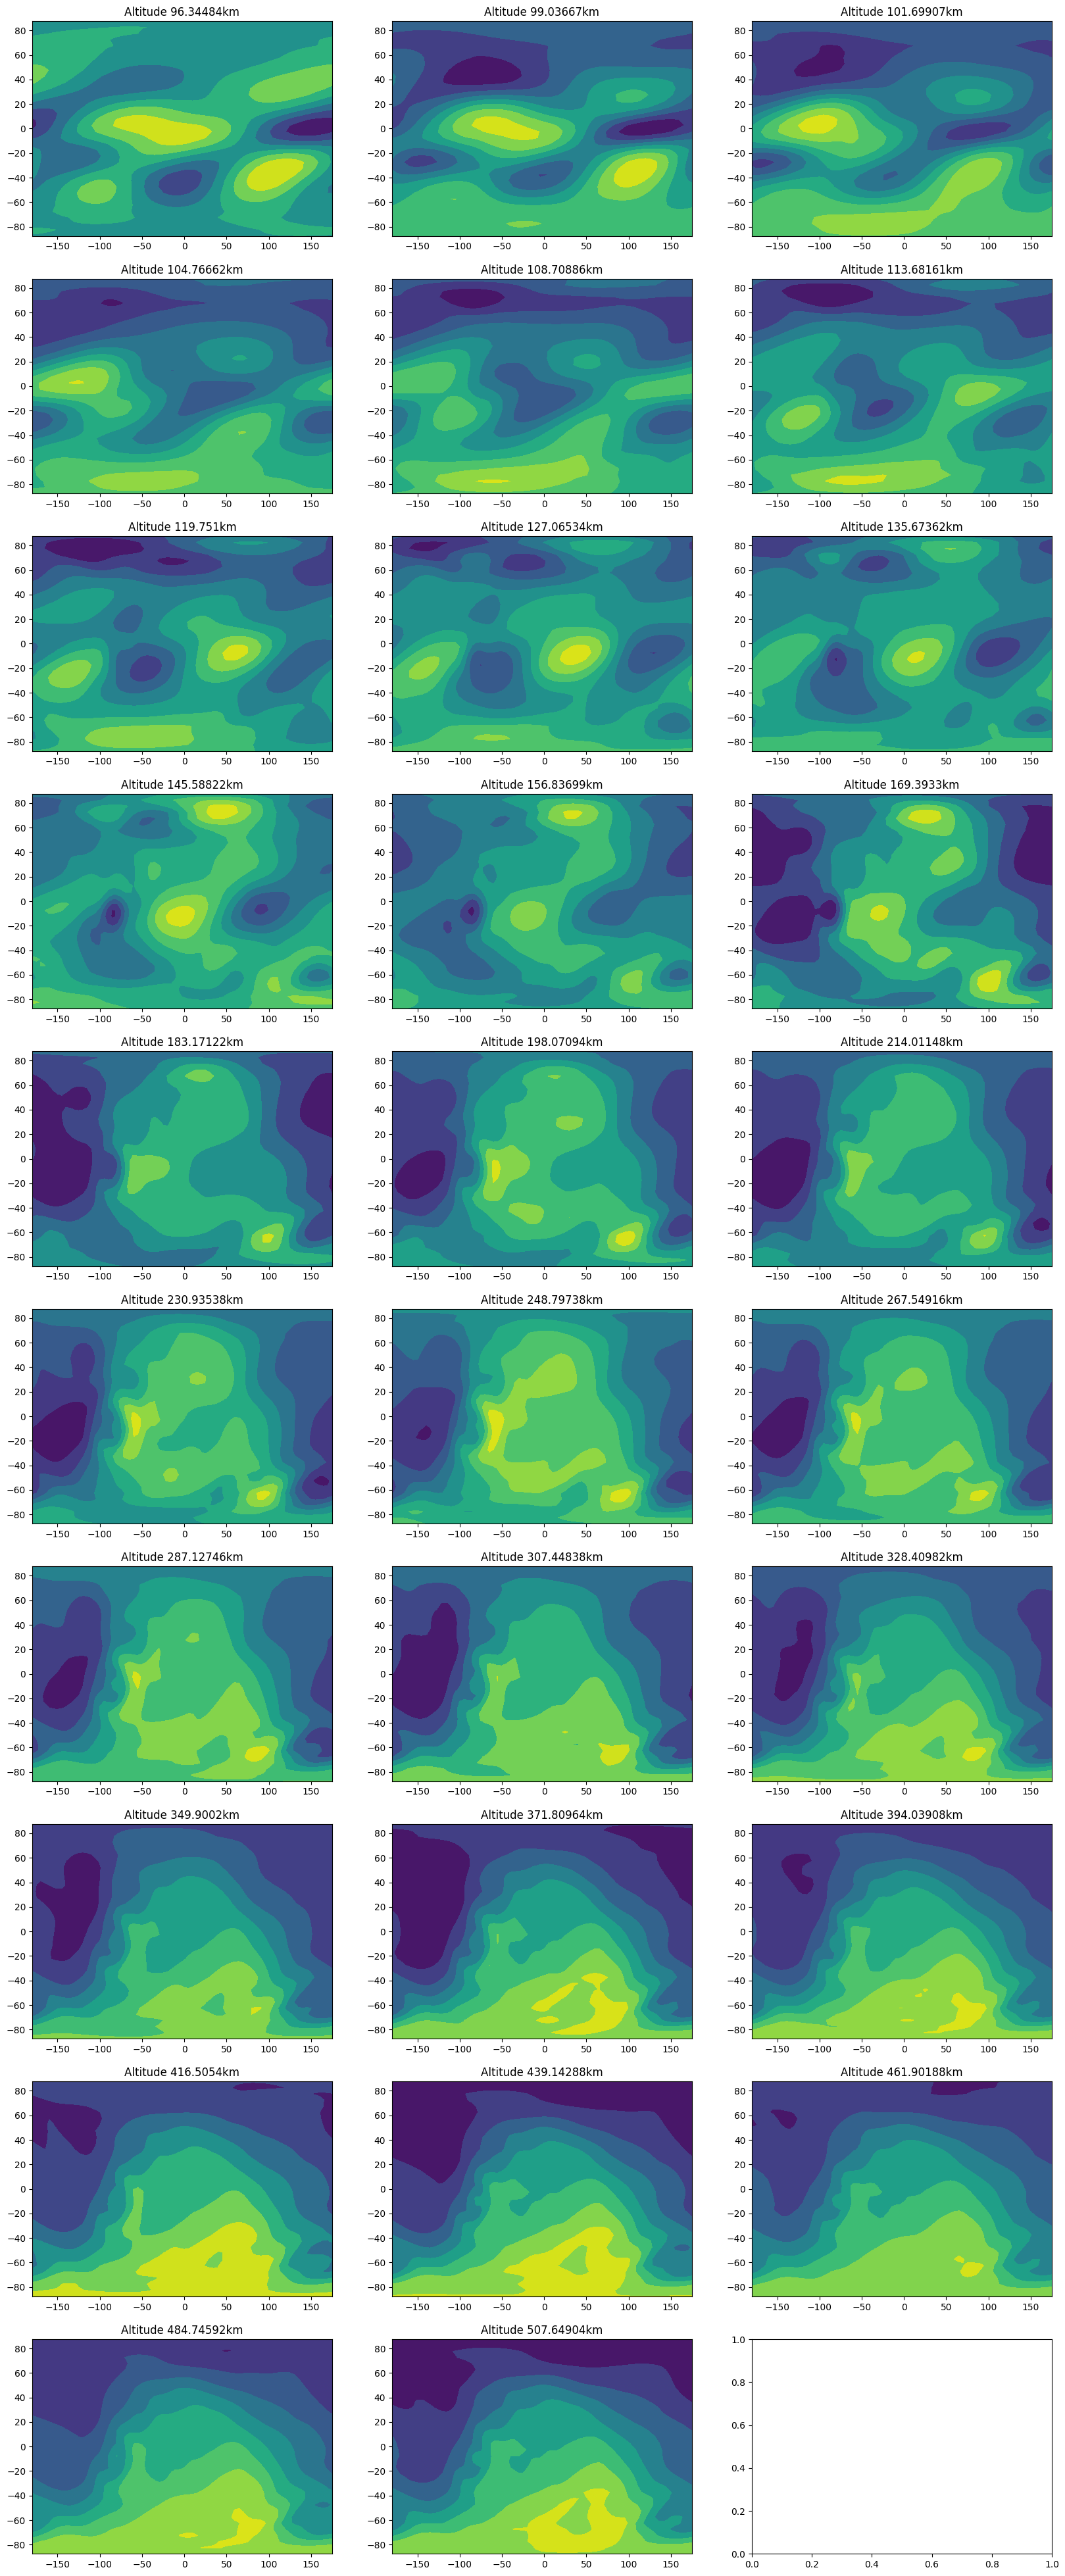

In [ ]:
fig, axs = plt.subplots(10,3,figsize=(20,50))
lev = 0
for i in np.arange(0,30,1):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(f'Altitude {ds1.Z.values[1,lev,18,36]/100000}km')
    axs[row, col].contourf(ds1.lon.values, ds1.lat.values, ds1.DEN.values[1,lev,:,:], cmap='viridis')
    lev += 1
plt.colorbar()
plt.show()

In [ ]:
# ORBIT TEST
r_orig = [6073.059668, 1581.629653, -2523.649488]
v_orig = [0.76478494, 5.50538445, 5.29437845]
h = np.cross(r_orig, v_orig) # angular momentum

r_new = [-4103.382133, -4858.933853, -2303.683337] # 1 hr later
v_new = np.cross(h, r_new) / (np.sqrt(r_new[0]**2 + r_new[1]**2 + r_new[2]**2))
v_new

array([ 34756.02095323, -11965.12858161, -36671.47550885])